In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from dateutil import tz
from datetime import date
import calendar
%matplotlib inline

In [3]:
regDataset = pd.read_csv(r'D:\Learning\EstudosDataScience\Projetos\DataScienceProjects\20210816 Lavacar\3 - Dados de Upload\20210829\regDataset.csv', encoding='latin-1', sep=';')
dayDataset = pd.read_csv(r'D:\Learning\EstudosDataScience\Projetos\DataScienceProjects\20210816 Lavacar\3 - Dados de Upload\20210829\dayDataset.csv', encoding='latin-1', sep=';')
monthDataset = pd.read_csv(r'D:\Learning\EstudosDataScience\Projetos\DataScienceProjects\20210816 Lavacar\3 - Dados de Upload\20210829\monthDataset.csv', encoding='latin-1', sep=';')

#### Preliminary analysis
- checking how data is provided
- check values
- check sizes

In [4]:
regDataset.head()

,client,vehicle,plate,value,service,date
0,GIOVANNE,FOCUS,NTN6C91,40,COMPLETA,2020-07-01
1,ROGERIO,ONIX,RDS8F01,40,COMPLETA,2020-07-01
2,TAXI MESSINHO,ONIX,IZV3H78,12,EXPRESSA,2020-07-01
3,MIGUEL CONSERTCAR,D20,ICR4980,100,COMPLETA,2020-07-02
4,LINDOLFO,CELTA,JBW0120,60,GERAL,2020-07-02


In [5]:
dayDataset.head()

,date,value
0,2020-04-24,200
1,2020-04-25,340
2,2020-04-25,160
3,2020-04-26,0
4,2020-04-26,340


In [6]:
monthDataset.head()

,date,value
0,2020-04-24,3945
1,2020-04-25,4285
2,2020-04-26,4285
3,2020-04-27,4745
4,2020-04-28,4945


In [7]:
regDataset.shape

(3207, 6)

In [8]:
dayDataset.shape

(757, 2)

In [9]:
monthDataset.shape

(1485, 2)

In [10]:
regDataset.describe(include='object')

,client,vehicle,plate,service,date
count,3194,3205,3121,3206,3207
unique,896,287,1468,115,346
top,CLAITON,SAVEIRO,IRG9182,COMPLETA,2020-08-01
freq,48,186,25,1879,31


In [11]:
# Remove spaces before and after
regDataset.client = regDataset.client.str.strip()
regDataset.vehicle = regDataset.vehicle.str.strip()
regDataset.plate = regDataset.plate.str.strip()
regDataset.service = regDataset.service.str.strip()

In [71]:
# Finding NaN values
regDataset.loc[regDataset.date.isna() | regDataset.client.isna() | regDataset.service.isna()]  

,client,vehicle,plate,value,service,date
211,NaN,SAVEIRO,BBF3F41,40,COMPLETA,2020-07-28
437,NaN,PUNTO,IUR1H25,40,COMPLETA,2020-08-18
827,NaN,MERIVA,ILI9751,50,COMPLETA,2020-09-29
1441,NaN,CORSA,NaN,20,EXPRESSA,2020-12-05
1442,NaN,CELTA,IPR2446,40,COMPLETA,2020-12-05
1602,NaN,S10,IVL1949,70,COMPLETA,2020-12-24
2802,NaN,HILUX,ITR3564,300,GERAL+BANCOS+MOTOR +CARPETE,2021-06-22


In [72]:
# Problem Solution
regDataset.loc[43,'service'] = 'EXPRESSA'
regDataset.loc[43, 'plate'] = 'IZJ6A25'
regDataset.loc[regDataset[regDataset.plate == 'IYG3E89'].index, 'client'] = 'LETICIA'
regDataset.loc[346, 'client'] = 'LUANA'
regDataset.loc[926, 'client'] = 'GILVASIO'
regDataset.loc[1186, 'client'] = 'EDILSON'
regDataset.loc[[854,1511], 'client'] = 'RONAI'
regDataset.loc[2014, ['client','vehicle','plate']] = ['GILBERTO','RANGER',np.nan]

In [73]:
# Tracking remaining NaNs
regDataset.isnull().sum()

client      7
vehicle     2
plate      86
value       0
service     0
date        0
dtype: int64

#### Sorted by: SERVICE
- Which services are the most recurrent ones?
- Which services provided the greatest profits?
- Which services are most done in certain dates?
- Which day has the most clients?

As we can see by the groups bellow, the dataset is full of trash, there is no pattern and there are plenty of mistakes. This can be solved in many ways. Here i believe is easier to go by force on each subpattern, after all there are only 111 registers.

In [96]:
regDataset.groupby('service').count().head(60)

,client,vehicle,plate,value,date
service,,,,,
BAIXO E INTERNA,1,1,1,1,1
CELTA,1,1,1,1,1
CMPLETA,3,3,3,3,3
CO0MPLETA,1,1,1,1,1
COMLETA,6,6,6,6,6
COMP+BANCOS+MOTOR,1,1,1,1,1
COMP-LETA,1,1,1,1,1
COMPETA,10,10,10,10,10
COMPETA+PARA CHOQUE,1,1,1,1,1


In [90]:
regDataset.groupby('service').count().tail(51)

,client,vehicle,plate,value,date
service,,,,,
EXRESSA,3,3,3,3,3
EXTERNA E POR BAIXO,1,1,1,1,1
EX´PRESSA,1,1,1,1,1
FOCUS,1,1,1,1,1
GERAL,218,218,215,218,218
GERAL + BANCOS,4,4,4,4,4
GERAL + MOTOR,6,6,6,6,6
GERAL +BANCOS,2,2,2,2,2
GERAL +MOTOR,3,3,3,3,3


In [106]:
# Find vehicle names in service column
regDataset[regDataset.service.str.contains('CELTA|COROLLA|FOCUS|GOL|RANGER|SAVEIRO|VECTRA')]

,client,vehicle,plate,value,service,date
539,CLAITON,SAVEIRO,ISK7790,20,SAVEIRO,2020-08-28
1193,EUCLIDES,FOCUS,IVE9384,40,FOCUS,2020-11-07
1194,VAGUINHO,RANGER,JAC4H31,70,RANGER,2020-11-09
1358,CRISTIANO,GOL,NaN,40,GOL,2020-11-23
1377,ROGER,SAVEIRO,IWE8B04,40,SAVEIRO,2020-11-25
1551,ALEXANDRE,CELTA,ILJ1G22,40,CELTA,2020-12-18
1781,BORDIGNON,SAVEIRO,JAI9D53,40,SAVEIRO,2021-01-15
2456,CLAVIANO,COROLLA,OJC9583,40,COROLLA,2021-05-01
2860,LUCAS,VECTRA,IFF9300,40,VECTRA,2021-07-02


In [107]:
# Corrects vehicle names in services by value column
regDataset.loc[regDataset[regDataset.service.str.contains('CELTA|COROLLA|FOCUS|GOL|RANGER|SAVEIRO|VECTRA')].index,'service'] = ['EXPRESSA','COMPLETA','COMPLETA','COMPLETA','COMPLETA','COMPLETA','COMPLETA','COMPLETA','COMPLETA']

In [141]:
# Split by '+' sign into columns
serviceSplit = regDataset.service.str.split('+',expand=True)
serviceSplit = serviceSplit.rename(columns={0:'service_name',1:'extra1',2:'extra2',3:'extra3'})
regNew = pd.concat([regDataset,serviceSplit],axis=1)

In [144]:
regNew.head()

,client,vehicle,plate,value,service,date,service_name,extra1,extra2,extra3
0,GIOVANNE,FOCUS,NTN6C91,40,COMPLETA,2020-07-01,COMPLETA,None,None,None
1,ROGERIO,ONIX,RDS8F01,40,COMPLETA,2020-07-01,COMPLETA,None,None,None
2,TAXI MESSINHO,ONIX,IZV3H78,12,EXPRESSA,2020-07-01,EXPRESSA,None,None,None
3,MIGUEL CONSERTCAR,D20,ICR4980,100,COMPLETA,2020-07-02,COMPLETA,None,None,None
4,LINDOLFO,CELTA,JBW0120,60,GERAL,2020-07-02,GERAL,None,None,None


In [177]:
# Removing spaces before and after service_name
regNew.service_name = regNew.service_name.str.strip()

In [196]:
def changeService(changeWhat,newName):
    indexs = []
    count = 0
    for index,row in enumerate(changeWhat):
        indexs.append(regNew.loc[regNew.service_name.str.fullmatch(row)].index)
    for item in indexs:
        regNew.loc[item, 'service_name'] = newName[count]
        count += 1

In [217]:
# Solving "COMPLETA" problems
tochangeCompleta = ['CMPLETA','CO0MPLETA','COMLETA','COMP','COMP-LETA','COMPETA','COMPL','COMPLEA',
                    'COMPLET','COMPLETA','COMPLETO','COMPLETRA','COMPLLETA','CONPLETA','OMPLETA','LAVAGEM COMPLETA']

changeService(tochangeCompleta,'COMPLETA')

In [190]:
# Solving 'EXPRESSA' problems
tochangeExpressa = ['EPRESSA','ESPRESSA','EXPRESA','EXPRESS','EXPRESSA','EXPRESSO','EXPRSSA','EXRESSA','EX´PRESSA']

changeService(tochangeExpressa,'EXPRESSA')

In [195]:
tochangeInterna = ['INTERNA','LAVAGEM POR DENTRO','LAVAGEM PO DENTRO','LIMP INTERNA','LIMPEZA POR DENTRO',
                   'LIMPEZA DOR DENTRO','POR DENTRO']

changeService(tochangeInterna,'INTERNA')


In [197]:
tochangeInferior = ['INFERIOR','LAVAGEM DE INFERIOR','LAVAGEM INFERIOR','LAVAGEM POR BAIXO','LAVAGEM POR AIXO',
                    'LIMPEZA INFERIOR','POR BAIXO']

changeService(tochangeInferior,'INFERIOR')

In [213]:
tochangeBancos = ['LAVAGEM BANCOS','LAVAGEM DE BANCOS','LAVAGEM DO BANCO DO MOTORISTA','LIMPESA DOS BANCOS DIANTEIRO',
                  'LIMPEZA BANCOS','LIMPEZA DOS BANCOS']

changeService(tochangeBancos, 'BANCOS')

In [215]:
tochangeRemain = ['LAVAGEM CAÇAMBA','LAVAGEM MOTO','LAVAGEM MOTOR']
newName = ['CAÇAMBA','MOTO','MOTOR']

changeService(tochangeRemain, newName)

ValueError: Must have equal len keys and value when setting with an iterable

In [248]:
# the remaining shall be splitted manually = cause it is easier
remains = ['BAIXO E INTERNA','EXPRESSA E POR BAIXO','EXTERNA E POR  BAIXO','EXPRESSA (E POR BAIXO)','COMPLETA MOTO',
           'COMPLETA BANCOS E MOTOR','POR BAIXO E MOTOR']  
indexs = []
count = 0
for index,row in enumerate(remains):
    indexs.append(regNew.loc[regNew.service_name.str.fullmatch(row)].index)

In [278]:
regNew.loc[[312,1930,2109,1567,442,2092]]
regNew.loc[312,['service_name','extra1']] = ['INFERIOR','INTERNA']
regNew.loc[1930,['service_name','extra1']] = ['EXPRESSA','INFERIOR']
regNew.loc[2109,['service_name','extra1']] = ['EXPRESSA','INFERIOR']
regNew.loc[1567,['service_name']] = ['MOTO']
regNew.loc[442,['service_name','extra1','extra2']] = ['COMPLETA','BANCOS','MOTOR']
regNew.loc[2092,['service_name','extra1']] = ['INFERIOR','MOTOR']
regNew.loc[2483,['service_name','extra1']] = ['EXPRESSA','INFERIOR']


In [307]:
# A more beautiful organization
regNew.groupby('service_name').count().sort_values('date',ascending=False)

,client,vehicle,plate,value,service,date,extra1,extra2,extra3
service_name,,,,,,,,,
COMPLETA,1991,1994,1949,1996,1996,1996,73,7,0
EXPRESSA,856,857,822,857,857,857,13,0,0
GERAL,256,257,254,257,257,257,39,2,2
INTERNA,62,62,62,62,62,62,1,0,0
INFERIOR,13,13,13,13,13,13,3,0,0
BANCOS,8,8,7,8,8,8,0,0,0
MOTOR,8,8,8,8,8,8,1,1,0
MOTO,4,4,4,4,4,4,0,0,0
CAÇAMBA,1,1,1,1,1,1,0,0,0


In [289]:
# Removing spaces
regNew.extra1 = regNew.extra1.str.strip()
regNew.extra2 = regNew.extra2.str.strip()
regNew.extra3 = regNew.extra3.str.strip()

In [363]:
# Checking how data is distributed
regNew.groupby('extra1').count()

,client,vehicle,plate,value,service,date,service_name,extra2,extra3
extra1,,,,,,,,,
1BANCO,1,1,1,1,1,1,1,0,0
2 CHPPS,1,1,1,1,1,1,1,0,0
2 LITRÕES,2,2,2,2,2,2,2,0,0
ACABAR INTERIOR,1,1,1,1,1,1,1,0,0
AR,1,1,1,1,1,1,1,0,0
AROMATIZANTE,1,1,1,1,1,1,1,0,0
BAIXO,3,3,3,3,3,3,3,0,0
BANCO TRASEIRO,1,1,1,1,1,1,1,0,0
BANCOS,44,45,45,45,45,45,45,7,2


In [348]:
# List of identified changes to make
ex1_changes = ['2 CHPPS','2 LITRÕES','AROMATIZANTE','INTERNA','AR','HIGIEN. AR','1BANCO','BANCO TRASEIRO','BANCOS',
               'BANCOS E CARPETE','BANCOS E FORRO','BCOS','BAIXO','EM BAIXO','INFERIOR','POR BAIXO','FAROL','MOTOR',
               'POLIMENTO']
ex1_new = ['CHOPP','CHOPP','AROMATIZANTE','INTERNA','HIG AR','HIG AR','BANCOS','BANCOS','BANCOS','BANCOS','BANCOS',
           'BANCOS','INFERIOR','INFERIOR','INFERIOR','INFERIOR','FAROL','MOTOR','POLIMENTO']

In [433]:
# Solving a few problems
tochange = []
count = 0

for item,row in enumerate(ex1_changes):
    tochange.append(regNew.loc[regNew.extra1 == ex1_changes[item]].index)
for item, row in enumerate(tochange):
    regNew.loc[row, 'extra1'] = ex1_new[count]
    count+=1

In [459]:
# Manually solving the remaining problmems
regNew.loc[846,'extra1'] = None
regNew.loc[1947,['extra1','extra2']] = ['MOTOR','BANCOS']
regNew.loc[1947, ['extra1','extra2']] = ['BANCOS','MOTOR']
regNew.loc[3013, ['extra1','extra2']] = ['BANCOS','INFERIOR']
regNew.loc[3038, ['extra1','extra2']] = ['BANCOS','MOTOR']
regNew.loc[3013, ['service_name','extra2']] = ['INFERIOR','MOTOR']

##### Question 1: Which service is the most recurrent?


In [544]:
groupedSer = regNew.groupby('service_name').count().sort_values('date',ascending=False)
groupedEx1 = regNew.groupby('extra1').count().sort_values('date',ascending=False)
groupedEx2 = regNew.groupby('extra2').count().sort_values('date',ascending=False)
groupedEx3 = regNew.groupby('extra3').count().sort_values('date',ascending=False)

In [665]:
recurrencyProducts = regNew.groupby('service_name').count().sort_values('date',ascending=False)

In [672]:
# Checks if there are repeated services along service_name, extra1, extra2 and extra3
# if so, then merges repeated or extende dataframe with new values
def checkRepeat(groupName):
    for row,item in enumerate(groupName.index):
        if recurrencyProducts.index.str.contains(item).sum() > 0:
            finalGroup.loc[item] = finalGroup.loc[item] + groupName.loc[item] 
        elif recurrencyProducts.index.str.contains(item).sum() == 0:
            finalGroup.loc[item] = groupName.loc[item]     
    return finalGroup

finalGroup = recurrencyProducts.copy()

checkRepeat(groupedEx1)
checkRepeat(groupedEx2)
checkRepeat(groupedEx3)

finalGroup = finalGroup.sort_values('date',ascending=False)

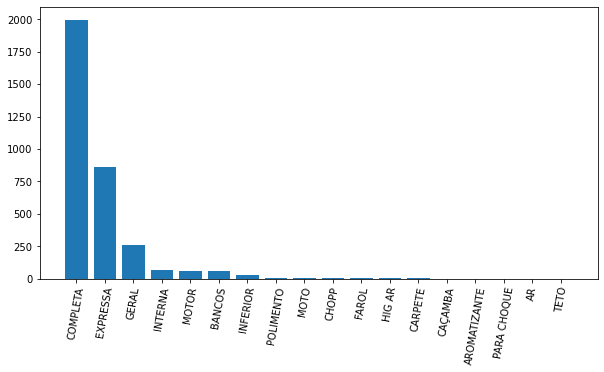

In [673]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

plt.xticks(rotation=80)
plt.tick_params(labelrotation=80,axis='x')
plt.bar(finalGroup.index,finalGroup.date)
plt.show()

##### Question 2: Which services provided the greatest profits?
Remember, this is a 'not good' dataset. There is no pattern and value column does not separates the services. This means that a value can be about two or more services. 
To avoid that, i wil consider only services done alone, without any other 'extra' services and deal with 'extra' services later perhaps.

In [687]:
# Filtering, grouping and summing
valueByService = regNew[regNew.extra1.isnull() & regNew.extra2.isnull() & regNew.extra3.isnull()].groupby('service_name').sum().sort_values('value',ascending=False)

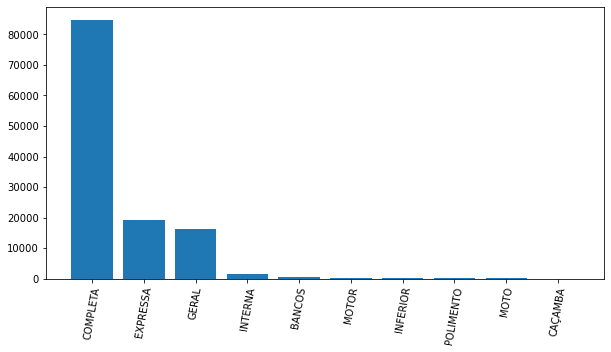

In [690]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

plt.xticks(rotation=80)
plt.tick_params(labelrotation=80,axis='x')
plt.bar(valueByService.index,valueByService.value)
plt.show()

##### Question 3: Which services are most done in certain dates?

In [697]:
# Converting to pandas datetime object
regNew['date'] = pd.to_datetime(regNew['date'])
regNew.loc[1558,'date'] = pd.to_datetime('2020-12-18') # Correcting 'Sunday' entry

In [733]:
# Creates day name columns
# If you want in pt-br, uncomment
regNew['week_day'] = regNew.date.dt.day_name()#.replace(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
                                  #['Domingo','Segunda','Terça','Quarta','Quinta','Sexta','Sábado'])

In [850]:
# Groups data and orders by the biggest
groupWeekService = regNew.groupby(['week_day','service_name']).count()

In [851]:
groupWeekService['Day_id'] = groupWeekService.index.get_level_values(0)
groupWeekService['Day_id'] = groupWeekService['Day_id'].map(sorterIndex)
groupWeekService = groupWeekService.sort_values(['Day_id','client'],ascending=[True,False])

In [854]:
''' 
Now, why would someone want this data?
Imagine for example that we need to know how much 'COMPLETA','EXPRESSA' and 'GERAL' distribution along the day.
We can do this by getting the proportion of each one for each day.
Example: 
    - I expect to wash 20 cars in a Saturday.
    - I know that in saturdays we have an distribution like:
        + COMPLETA: 473/793 = 59% ->>> for 20 cars: ~12 COMPLETAS
        + EXPRESSA: 262/793 = 33% ->>> for 20 cars: ~7 EXPRESSAS
        + GERAL: 45/793 = 5,6% ->>> for 20 cars: <1 GERAL
        + INTERNA: 13/793 = 1,6% ->>> for 20 cars: <1 INTERNA  
        = total: 793

'''
groupWeekService.loc['Saturday']

,client,vehicle,plate,value,service,date,extra1,extra2,extra3,Day_id
service_name,,,,,,,,,,
COMPLETA,473,472,454,474,474,474,9,0,0,6
EXPRESSA,262,263,242,263,263,263,3,0,0,6
GERAL,45,45,44,45,45,45,4,0,0,6
INTERNA,13,13,13,13,13,13,0,0,0,6
MOTOR,2,2,2,2,2,2,0,0,0,6
INFERIOR,1,1,1,1,1,1,0,0,0,6


##### Question 4: Which day has the most clients?

In [815]:
newDf = regNew.groupby('week_day').count()

In [816]:
# Preparing sorting by day name
sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
newDf['Day_id'] = newDf.index
newDf['Day_id'] = newDf['Day_id'].map(sorterIndex)

In [779]:
newDf.sort_values('Day_id')

,client,vehicle,plate,value,service,date,service_name,extra1,extra2,extra3,Day_id
week_day,,,,,,,,,,,
Monday,482,482,474,482,482,482,482,29,3,0,1
Tuesday,411,415,409,415,415,415,415,20,4,1,2
Wednesday,408,408,397,408,408,408,408,21,3,1,3
Thursday,491,492,482,492,492,492,492,27,0,0,4
Friday,612,612,603,612,612,612,612,13,1,0,5
Saturday,796,796,756,798,798,798,798,16,0,0,6


<BarContainer object of 6 artists>

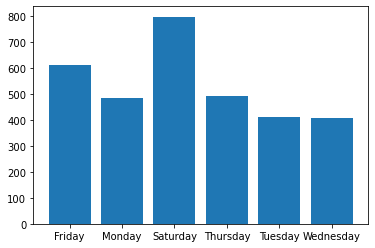

In [781]:
plt.bar(newDf.index, newDf.client)

####  Sorted by: CLIENT (in progress)
- Who is the most recurrent client?
- Who has spended the most?
- Which clients has most different vehicles, what can be done with that?
- Which client asks for each type of services? Who asks most 'GERAL', 'EXPRESSA' AND 'COMPLETA'

In [1025]:
regClients = regNew.copy()
regClients.dropna(subset=['client'],how='any',inplace=True)

In [1026]:
regClients[regClients.client.str.contains('ZIA')].groupby('client').count()

,vehicle,plate,value,service,date,service_name,extra1,extra2,extra3,week_day
client,,,,,,,,,,
LUCAS ZIANI,1,1,1,1,1,1,0,0,0,1
LUZIA,4,4,4,4,4,4,0,0,0,4
ZIANI,38,37,38,38,38,38,9,0,0,38
ZIANNI,3,3,3,3,3,3,1,0,0,3


In [1027]:
regClients.groupby(['client','plate']).count().sort_values('date',ascending=False).head(10)

,,vehicle,value,service,date,service_name,extra1,extra2,extra3,week_day
client,plate,,,,,,,,,
EUCLIDES,IVE9384,25,25,25,25,25,0,0,0,25
CLAITON,IRG9182,25,25,25,25,25,0,0,0,25
EDUARDO,IXQ5855,16,16,16,16,16,0,0,0,16
JONATHAN JAIME,IWI1F84,14,14,14,14,14,1,0,0,14
CLAITON,ISK7790,14,14,14,14,14,0,0,0,14
FERNANDO,IZW5E79,13,13,13,13,13,0,0,0,13
ALLIANZA,IXH2778,13,13,13,13,13,0,0,0,13
CONRADO,IYH0119,12,12,12,12,12,0,0,0,12
TUCA,IZY4J49,12,12,12,12,12,0,0,0,12


In [1047]:
regClients.groupby(['client']).count().to_csv(r'D:\Learning\EstudosDataScience\Projetos\DataScienceProjects\20210816 Lavacar\4 - Analises\regClientAux.csv', index=True, encoding='latin-1', sep=';')

In [1062]:
regClients.groupby(['client','plate']).count()

vehicle  value  service  date  service_name  extra1  \
client           plate                                                          
                 ISDA44         1      1        1     1             1       0   
1000 ENGENHARIA  IUT3395        1      1        1     1             1       0   
ABEL             QXT3C88        1      1        1     1             1       0   
ADALTO           IPM8J61        1      1        1     1             1       0   
ADALTO RODRIGUES IPM8J61        1      1        1     1             1       0   
...                           ...    ...      ...   ...           ...     ...   
ZIANI            QJZ4G00        1      1        1     1             1       0   
                 QRC0B00        1      1        1     1             1       0   
ZIZI             CXC7C99        2      2        2     2             2       0   
                 IPX1135        1      1        1     1             1       0   
                 IPX1139        1      1        1     1             1       0   

                          extra2  extra3  week_day  
client           plate                              
                 ISDA44        0       0         1  
1000 ENGENHARIA  IUT3395       0       0         1  
ABEL             QXT3C88       0       0         1  
ADALTO           IPM8J61       0       0         1  
ADALTO RODRIGUES IPM8J61       0       0         1  
...                          ...     ...       ...  
ZIANI            QJZ4G00       0       0         1  
                 QRC0B00       0       0         1  
ZIZI             CXC7C99       0       0         2  
                 IPX1135       0       0         1  
                 IPX1139       0       0         1  

[1817 rows x 9 columns]

In [1029]:
# Solving some aparent problems
regClients.loc[[216,418,752,1148,1503,1929,853],'plate'] = ['IRG9182','IRG9182','ISK7790','ISK7790','ISK7790','ISK7790','ISK7790']
regClients.loc[[416,363,525,2016],'client'] = 'ZIANI'
regClients.loc[788,'client'] = 'ZIZI'
regClients.loc[917,'client'] = 'ELIZETI'
regClients.loc[[526,1316,1766],'vehicle'] = 'ECOSPORT'
regClients.loc[[1069,747,1766,526,226],'client'] = 'ZETI'
regClients.loc[747,'plate'] = 'IWH6997'

In [1030]:
regClients[regClients.client.str.contains('ZE')].sort_values('client')

,client,vehicle,plate,value,service,date,service_name,extra1,extra2,extra3,week_day
232,BETO FUZER,TORO,IZA2E13,90,COMPLETA,2020-07-30,COMPLETA,BANCOS,None,None,Thursday
917,ELIZETI,HB20,IYI0937,20,EXPRESSA,2020-10-10,EXPRESSA,None,None,None,Saturday
1700,ELIZETI,HB20,IYI0937,60,GERAL,2021-01-04,GERAL,None,None,None,Monday
220,GRAZE,NEW TUCSON,IYX0537,50,COMPLETA,2020-07-29,COMPLETA,None,None,None,Wednesday
2530,ZETI,ECOSPORT,IWH6997,40,COMPLETA,2021-05-12,COMPLETA,None,None,None,Wednesday
2388,ZETI,ECOSPORT,IWH6997,20,EXPRESSA,2021-04-23,EXPRESSA,None,None,None,Friday
1766,ZETI,ECOSPORT,IWH6997,40,COMPLETA,2021-01-14,COMPLETA,None,None,None,Thursday
1656,ZETI,ECOSPORT,IWH6997,20,EXPRESSA,2020-12-30,EXPRESSA,None,None,None,Wednesday
1544,ZETI,ECOSPORT,IWH6997,40,COMPLETA,2020-12-17,COMPLETA,None,None,None,Thursday
1316,ZETI,ECOSPORT,IWH6997,20,EXPRESSA,2020-11-20,EXPRESSA,None,None,None,Friday
